<a href="https://colab.research.google.com/github/Jay0310/Jay0310.github.io/blob/master/SVHN_with_94_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [0]:
import seaborn as sns
from scipy.io import loadmat
from skimage import color
from skimage import io

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
def load_data(path):
  data=loadmat(path)
  return data['X'],data['y']

x_train,y_train=load_data("/content/drive/My Drive/dataset/train_32x32.mat")


In [0]:
x_train.shape

(32, 32, 3, 73257)

In [0]:
y_train.shape

(73257, 1)

In [0]:
x_test,y_test=load_data("/content/drive/My Drive/dataset/test_32x32.mat")

In [0]:
(x_test.shape),(y_test.shape)

((32, 32, 3, 26032), (26032, 1))

In [0]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Flatten,Dropout,Dense,Activation,MaxPool2D,Conv2D
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
y_train[0]

array([1], dtype=uint8)

In [0]:
#transposing the image
x_train,y_train=x_train.transpose((3,0,1,2)),y_train[:,0]

In [0]:
x_train.shape

(73257, 32, 32, 3)

In [0]:
y_train.shape

(73257,)

In [0]:
x_test,y_test=x_test.transpose((3,0,1,2)),y_test[:,0]

In [0]:
x_test.shape

(26032, 32, 32, 3)

In [0]:
y_test.shape

(26032,)

In [0]:
y_test[0]

5

In [0]:
def plot_images(img, labels, nrows, ncols):
    """ Plot nrows x ncols images
    """
    fig, axes = plt.subplots(nrows, ncols)
    for i, ax in enumerate(axes.flat): 
        if img[i].shape == (32, 32, 3):
            ax.imshow(img[i])
        else:
            ax.imshow(img[i,:,:,0])
        ax.set_xticks([]); ax.set_yticks([])


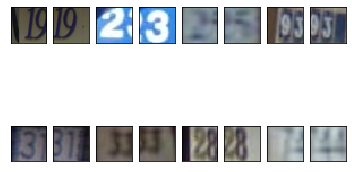

In [0]:
import matplotlib.pyplot as plt
plot_images(x_train, y_train, 2, 8)


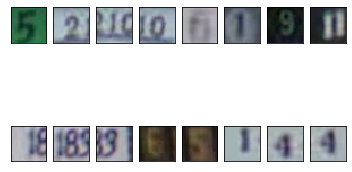

In [0]:
plot_images(x_test, y_test, 2, 8)


In [0]:
np.unique(y_train)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=uint8)

In [0]:
#Converting label 10 to 0
y_train[y_train==10]=0
y_test[y_test==10]=0

In [0]:
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)

In [0]:
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(x_train,y_train,test_size=0.3,random_state=0)

In [0]:
(x_tr.shape),(y_tr.shape),(x_val.shape),(y_val.shape)

((51279, 32, 32, 3), (51279, 10), (21978, 32, 32, 3), (21978, 10))

In [0]:
#Convert RGB to Greyscale
def rgb2grey(images):
  return np.expand_dims(np.dot(images,[0.2990,0.5870,0.1140]),axis=3)

In [0]:
train_greyscale=rgb2grey(x_tr).astype(np.float32)

In [0]:
test_greyscale=rgb2grey(x_test).astype(np.float32)
val_greyscale=rgb2grey(x_val).astype(np.float32)

In [0]:
(train_greyscale.shape),(test_greyscale.shape),(val_greyscale.shape)

((51279, 32, 32, 1), (26032, 32, 32, 1), (21978, 32, 32, 1))

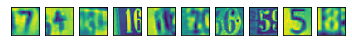

In [0]:
plot_images(train_greyscale,y_tr,1,10)

In [0]:
#Normalising the data
#calculating mean on training data
train_mean=np.mean(train_greyscale,axis=0)
#calculating std on training data
train_std=np.std(train_greyscale,axis=0)
#substract it equally
train_greyscale_norm = (train_greyscale - train_mean) / train_std
test_greyscale_norm = (test_greyscale - train_mean) / train_std
val_greyscale_norm = (val_greyscale - train_mean) / train_std

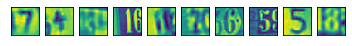

In [0]:
plot_images(train_greyscale_norm, y_tr,1,10)

In [0]:
(y_tr.shape),(y_test.shape),(y_val.shape)

((51279, 10), (26032, 10), (21978, 10))

In [0]:
#Storing the data
import h5py

# Create file
h5f = h5py.File('SVHN_grey.h5', 'w')

# Store the datasets
h5f.create_dataset('x_tr', data=train_greyscale_norm)
h5f.create_dataset('y_tr', data=y_tr)
h5f.create_dataset('x_test', data=test_greyscale_norm)
h5f.create_dataset('y_test', data=y_test)
h5f.create_dataset('x_val', data=val_greyscale_norm)
h5f.create_dataset('y_val', data=y_val)

# Close the file
h5f.close()

In [0]:
x_tr=x_tr.astype('float32')
x_val=x_val.astype('float32')

In [0]:
x_test=x_test.astype('float32')

In [0]:
x_tr=x_tr/255
x_val=x_val/255
x_test=x_test/255

In [0]:
#Building a model
batch_size=200
nb_epoch=20
output_dim=10

In [0]:
from keras import backend as K

In [0]:
model=Sequential()
#layer 1
model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu',input_shape=(32,32,1)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#layer 2
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(32,kernel_size=(3,3),padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#layer 3 
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(Dense(output_dim,activation='softmax'))

model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 32)        18464     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 32)        9248      


In [0]:
model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])

In [0]:
history=model.fit(train_greyscale_norm,y_tr,batch_size=batch_size,epochs=nb_epoch,validation_data=(val_greyscale_norm,y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 51279 samples, validate on 21978 samples
Epoch 1/20





51279/51279 [==============================] - 12s 236us/step - loss: 1.2405 - acc: 0.5817 - val_loss: 0.5117 - val_acc: 0.8478
Epoch 2/20
51279/51279 [==============================] - 4s 82us/step - loss: 0.5364 - acc: 0.8376 - val_loss: 0.3955 - val_acc: 0.8824
Epoch 3/20
51279/51279 [==============================] - 4s 82us/step - loss: 0.4368 - acc: 0.8671 - val_loss: 0.3551 - val_acc: 0.8972
Epoch 4/20
51279/51279 [==============================] - 4s 82us/step - loss: 0.3964 - acc: 0.8798 - val_loss: 0.3123 - val_acc: 0.9074
Epoch 5/20
51279/51279 [==============================] - 4s 82us/step - loss: 0.3632 - acc: 0.8912 - val_loss: 0.3050 - val_acc: 0.9086
Epoch 6/20
51279/51279 [==============================] - 4s 82us/step - loss: 0.3463 - acc: 0.8965 - val_loss: 0.2999 - val_acc: 0.9115
Epoch 7/20
51279/51279 [

In [0]:
score=model.evaluate(test_greyscale_norm,y_test)
score

26032/26032 [==============================] - 2s 67us/step


[0.2332476703764913, 0.9348494161032576]

In [0]:
predict=model.predict(test_greyscale_norm,batch_size=batch_size)

In [0]:
pred=model.predict(test_greyscale_norm[46:47],batch_size=batch_size)

In [0]:
pred

array([[7.7760382e-07, 9.9981445e-01, 2.6092759e-05, 7.9828387e-05,
        3.6918587e-05, 1.0945405e-05, 4.3170766e-07, 1.9853789e-05,
        1.3894437e-06, 9.2680521e-06]], dtype=float32)

In [0]:
predict

array([[4.46454360e-05, 6.13564116e-05, 1.23980292e-03, ...,
        2.48313043e-03, 2.10992112e-05, 1.68699946e-04],
       [9.06622972e-07, 3.18114107e-05, 9.99874830e-01, ...,
        1.36396156e-05, 8.75671958e-06, 3.27321286e-05],
       [2.58118991e-04, 9.94089365e-01, 3.70402908e-04, ...,
        5.61802372e-05, 1.99569826e-04, 1.60432501e-05],
       ...,
       [1.95107186e-05, 3.93159175e-03, 1.11443445e-03, ...,
        9.93045032e-01, 1.20686252e-06, 9.12270567e-04],
       [9.55245108e-04, 3.86596366e-04, 7.94629086e-05, ...,
        1.21158555e-05, 1.21666980e-03, 3.10466680e-06],
       [5.27729862e-05, 9.45170037e-03, 3.94858042e-04, ...,
        9.89923060e-01, 7.55465237e-07, 5.20180220e-05]], dtype=float32)

In [0]:
y_test[22]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [0]:
predict[22]

array([9.2349346e-06, 9.9868280e-01, 1.5254591e-04, 2.8327692e-04,
       3.9785323e-04, 2.5179391e-04, 9.9696794e-05, 3.9872572e-05,
       5.8017016e-05, 2.4897279e-05], dtype=float32)